# class-balance weighted least squares method with linear model

In [248]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
np.random.seed(1)

In [249]:
def generate_data(n_total, n_positive):
    x = np.random.normal(size=(n_total, 2))
    x[:n_positive, 0] -= 2
    x[n_positive:, 0] += 2
    x[:, 1] *= 2.
    y = np.empty(n_total, dtype=np.int64)
    y[:n_positive] = 0
    y[n_positive:] = 1
    return x, y

In [250]:
def cwls(train_x, train_y, test_x):
    
    # implement this function
    N = len(train_x)
    n = len(test_x)
    train_x = np.concatenate( (np.ones((N,1)),train_x) , axis = 1)
    test_x = np.concatenate( (np.ones((n,1)),test_x) , axis = 1)
    phi_train = np.sqrt(np.sum((train_x[None] - train_x[:, None])**2, axis=2))
    phi_test = np.sqrt(np.sum((train_x[None] - test_x[:, None])**2, axis=2))
    labels = np.array([0,1])
    n_i = np.array([len(train_y[train_y == labels[0]])/N, len(train_y[train_y == labels[1]])/N])
    nl = len(labels)
    A = np.zeros((nl,nl))
    b = np.zeros(nl)

    for i in range(nl):
        ind_i = train_y == labels[i]
        b[i] = np.mean(phi_test[:,ind_i])
        for j in range(nl):
            ind_j = train_y == labels[j]
            A[i,j] = np.mean((phi_train[ind_i])[:,ind_j])

    tilde_pi = (A[0,1] - A[1,1] - b[0] + b[1])/(2*A[0,1] - A[0,0] - A[1,1])
    hat_pi = min(1,max(0,tilde_pi)) 
    
    # Compute weighting probability
    hat_pi = np.array([hat_pi, 1 - hat_pi])
    weight = hat_pi[train_y - 1] / n_i[train_y - 1]
    target = 2*train_y - 3
    W = np.tile(weight, (train_x.shape[1],1)).T

    # Regression
    theta = np.linalg.solve(train_x.T @ (W * train_x), train_x.T @ (weight * target))
    theta_uw = np.linalg.solve(train_x.T @ train_x, train_x.T @ target) 

    return theta, theta_uw

In [251]:
def visualize(train_x, train_y, test_x, test_y, theta):
    for x, y, name in [(train_x, train_y, 'train'), (test_x, test_y, 'test')]:
        plt.clf()
        plt.figure(figsize=(8, 8))
        plt.xlim(-5., 5.)
        plt.ylim(-7., 7.)
        lin = np.array([-5., 5.])
        plt.plot(lin, -(theta[2] + lin * theta[0]) / theta[1])
        plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1],marker='$O$', c='blue')
        plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1],marker='$X$', c='red')
        plt.title(name)
        plt.show()
    #plt.savefig('lecture8-h3-{}.png'.format(name))

# Visualize the class-balance weighted regression

<Figure size 432x288 with 0 Axes>

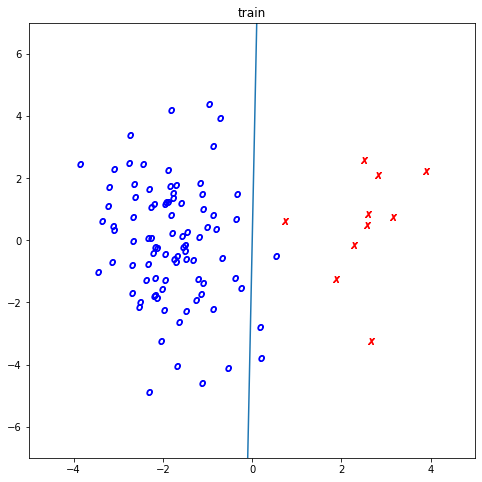

<Figure size 432x288 with 0 Axes>

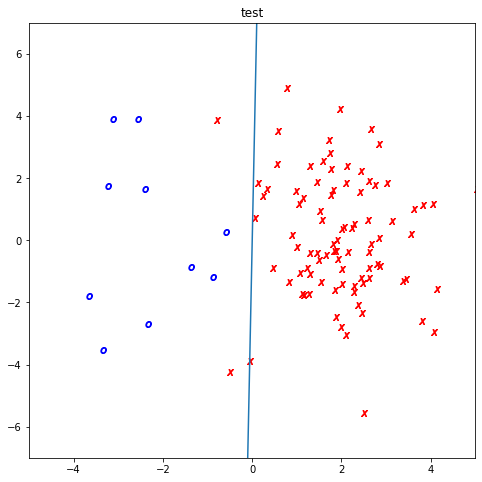

In [252]:
train_x, train_y = generate_data(n_total=100, n_positive=90)
eval_x, eval_y = generate_data(n_total=100, n_positive=10)
theta, theta_uw = cwls(train_x, train_y, eval_x)
visualize(train_x, train_y, eval_x, eval_y, theta)

# Visualize Normal Regression

<Figure size 432x288 with 0 Axes>

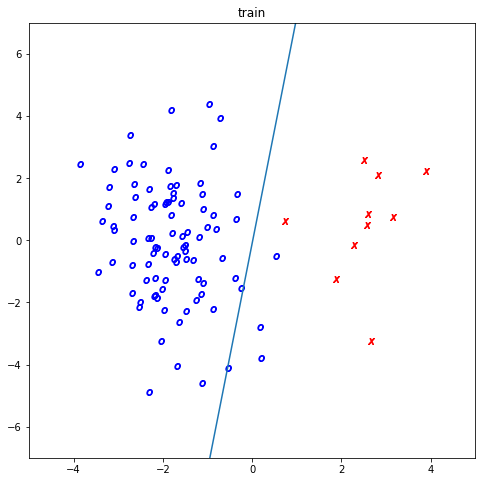

<Figure size 432x288 with 0 Axes>

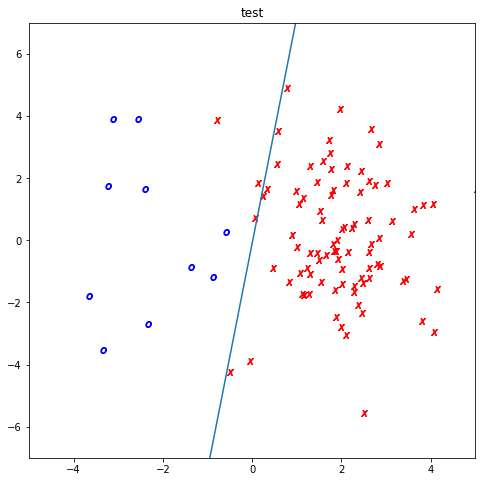

In [253]:
visualize(train_x, train_y, eval_x, eval_y, theta_uw)